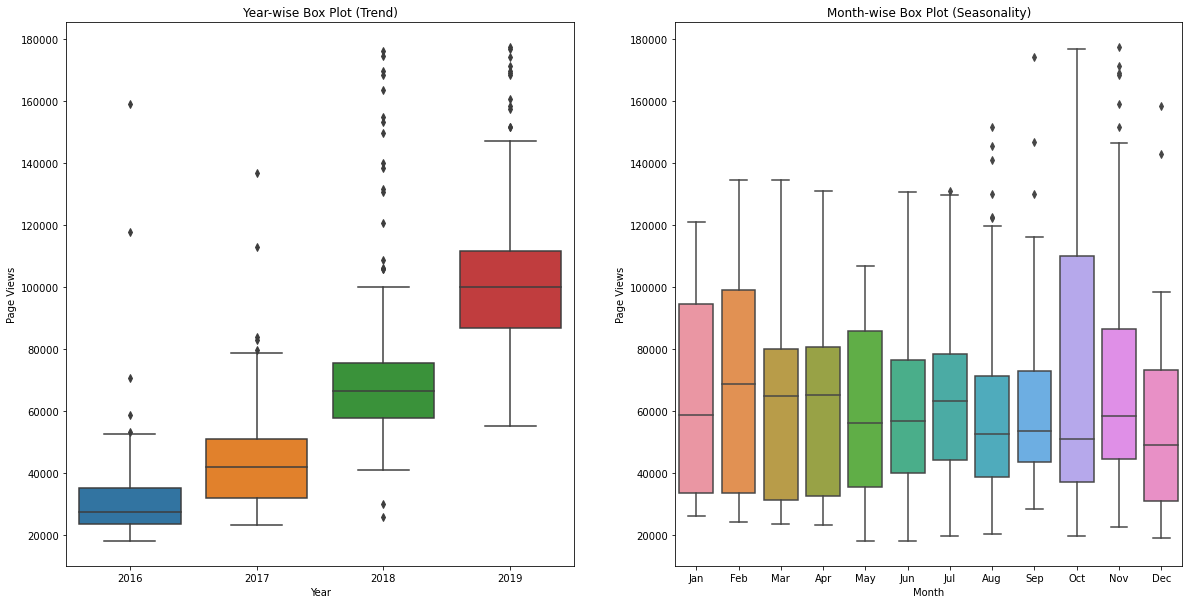

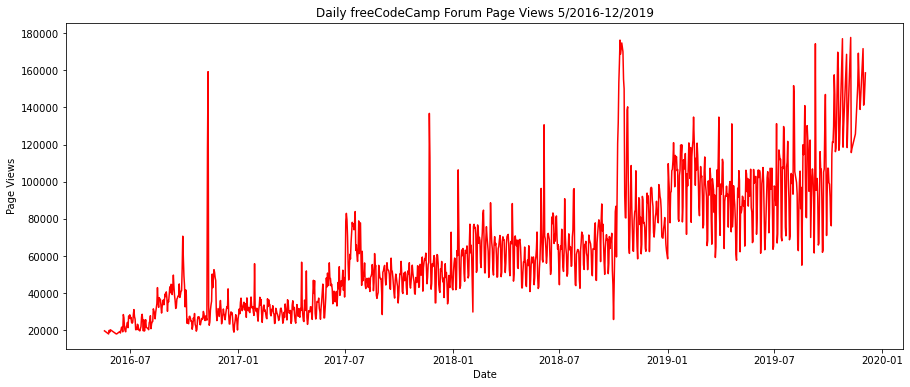

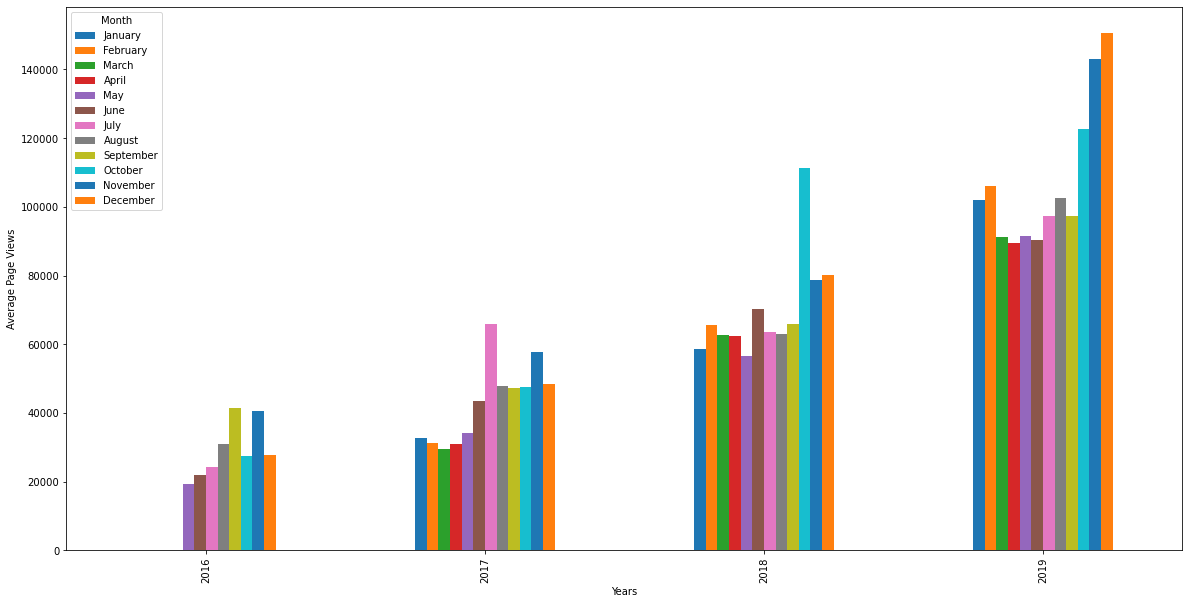

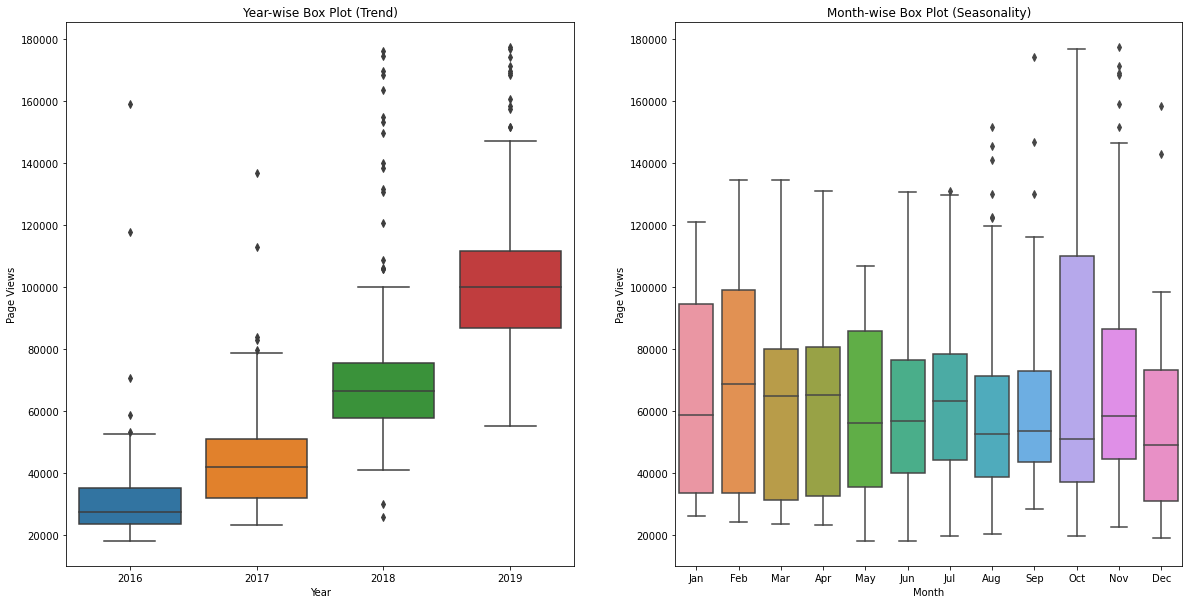

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col=['date'])
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(df.index, df['value'], c='red')
    ax.set(xlabel='Date',
          ylabel='Page Views',
          title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot
    tf = df.copy()
    tf['year'] = df.index.year
    tf['month'] = df.index.month
    df_bar = tf.groupby(["year", "month"])["value"].mean()
    df_bar = df_bar.unstack()
    fig = df_bar.plot(kind='bar', figsize=(20,10), legend=True).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Month', labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box["month_num"] = df_box["date"].dt.month
    df_box = df_box.sort_values("month_num")

    # Draw box plots (using Seaborn)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax=ax1)
    ax1.set_title("Year-wise Box Plot (Trend)") 
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2)
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_line_plot()
draw_bar_plot()
draw_box_plot()

In [3]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [16]:
(df['value']/df['value'].max())*100 < 2.5 

date
2016-05-09     True
2016-05-10     True
2016-05-11     True
2016-05-12     True
2016-05-13     True
              ...  
2019-11-29    False
2019-11-30    False
2019-12-01    False
2019-12-02    False
2019-12-03    False
Name: value, Length: 1304, dtype: bool

In [17]:
df['value'].max()

1173655

In [18]:
df['value'].tail()

date
2019-11-29    171584
2019-11-30    141161
2019-12-01    142918
2019-12-02    220144
2019-12-03    158549
Name: value, dtype: int64

In [19]:
(df['value']/df['value'].max())*100 > 97.5

date
2016-05-09    False
2016-05-10    False
2016-05-11    False
2016-05-12    False
2016-05-13    False
              ...  
2019-11-29    False
2019-11-30    False
2019-12-01    False
2019-12-02    False
2019-12-03    False
Name: value, Length: 1304, dtype: bool

In [20]:
((df['value']/df['value'].max())*100 > 97.5).value_counts()

False    1302
True        2
Name: value, dtype: int64

In [ ]:
df.groupby()

month             1              2             3             4             5   \
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

month            6             7              8             9              10  \
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

month             11      

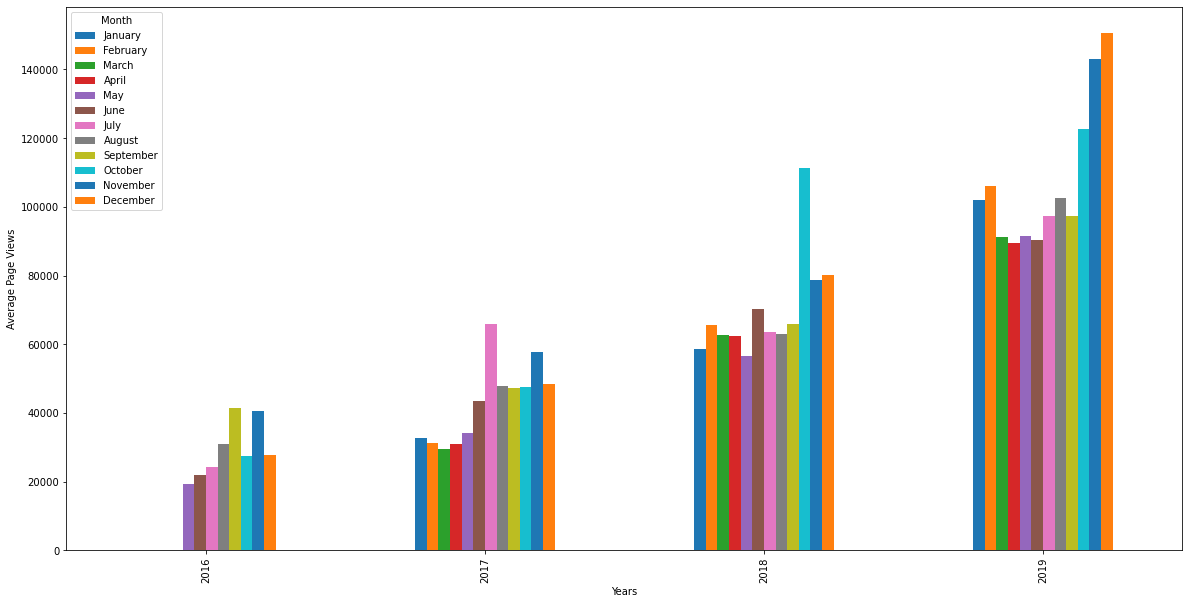

In [81]:
tf = df.copy()
tf['year'] = df.index.year
tf['month'] = df.index.month
df_bar = tf.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()
df_bar.plot(kind='bar', figsize=(20,10))
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title='Month', labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

year  month
2018  3        31
2017  7        31
2019  1        31
2018  12       31
2019  5        31
2018  8        31
      7        31
      5        31
      1        31
2017  12       31
2019  3        31
2017  8        31
      10       31
2016  8        31
2017  3        31
      1        31
2016  10       31
2017  5        31
2016  12       31
2017  6        30
2016  11       30
2019  9        30
2018  11       30
2016  9        30
2018  9        30
      4        30
      6        30
2019  7        30
2017  11       30
      9        30
      4        30
2019  4        30
      8        29
      6        28
2018  2        28
2019  2        28
2018  10       28
2017  2        28
2016  7        28
2019  10       22
2016  6        19
2019  11       14
2016  5         5
2019  12        2
dtype: int64

year
2016       AxesSubplot(0.125,0.2;0.775x0.68)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018       AxesSubplot(0.125,0.2;0.775x0.68)
2019       AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

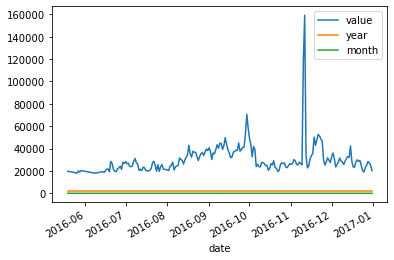

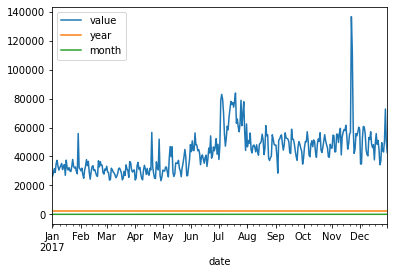

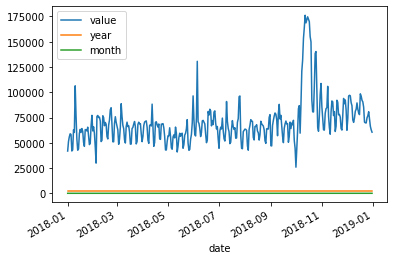

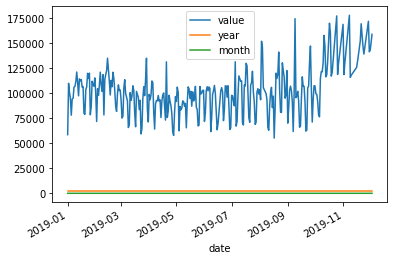

In [66]:
tf.plot()

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


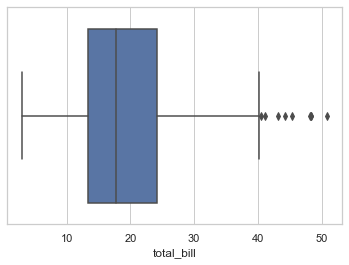

In [84]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
print(tips)
ax = sns.boxplot(x=tips["total_bill"])

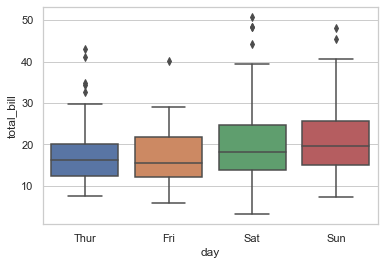

In [83]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

In [125]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")


NameError: name 'df_box' is not defined

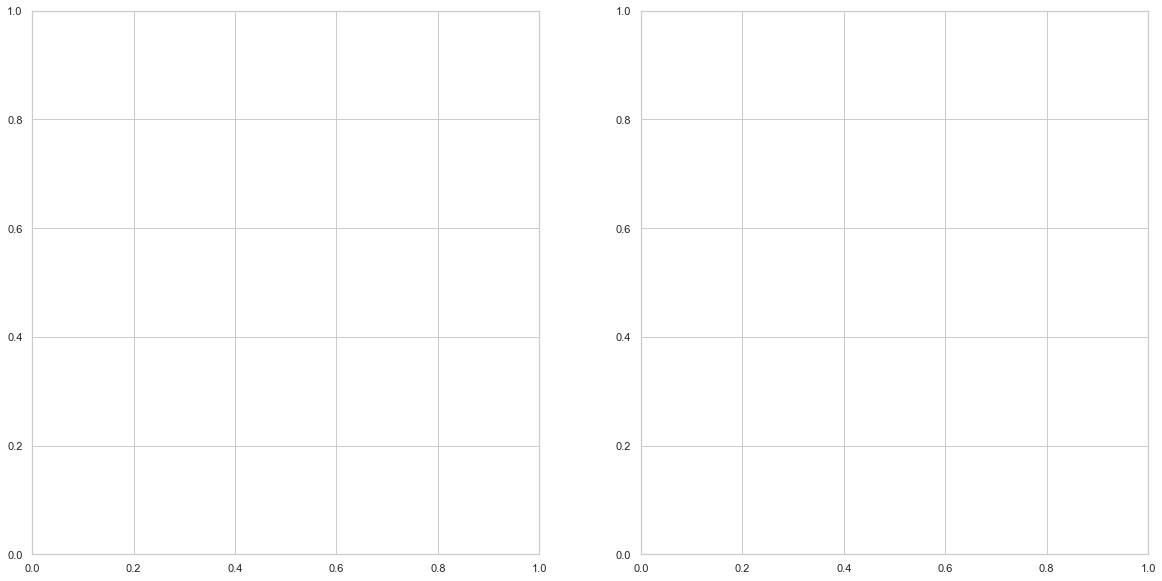

In [124]:
tmp.plot(kind='bar', x='year', y=tmp.sum(axis=1))

In [128]:
df_box["date"].dt.month

210      1
937      1
936      1
935      1
934      1
        ..
567     12
566     12
565     12
201     12
1237    12
Name: date, Length: 1238, dtype: int64